<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Modelaje Estadístico</center></span>

<figure>
<center>
<img src="../Imagenes/loglikelihood.png" width="800" height="800" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Joint Log Likelihood per N, for Beta distribution Maxima at alpha=beta=2 </p>
</figcaption>
</figure>

Fuente:<a href="https://commons.wikimedia.org/wiki/File:Max_(Joint_Log_Likelihood_per_N)_for_Beta_distribution_Maxima_at_alpha%3Dbeta%3D2_-_J._Rodal.png">Dr. J. Rodal</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0">CC BY-SA 3.0</a>, via Wikimedia Commons

## <span style="color:#4361EE">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Camilo José Torres Jiménez, Msc, cjtorresj@unal.edu.co
1. Daniel  Montenegro, Msc, dextronomo@gmail.com 

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com
5. Jessica López Mejía, jelopezme@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

6. Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

7. David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

8. Dairo Moreno, damoralesj@unal.edu.co
9. Joan Castro, jocastroc@unal.edu.co
10. Bryan Riveros, briveros@unal.edu.co
11. Rosmer Vargas, rovargasc@unal.edu.co
12. Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

13. Giovvani Barrera, udgiovanni@gmail.com
14. Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Etiquetado de los datos](#Etiquetado-de-los-datos)
* [Modelo de probabilidad](#Modelo-de-probabilidad)
* [Log verosimilitud y función de pérdida](#Log-verosimilitud-y-función-de-pérdida)
* [Entrenamiento del modelo (la red neuronal](#Entrenamiento-del-modelo-(la-red-neuronal)


## <span style="color:blue">Introducción</span>

El concepto de log-verosimilitud es una medida utilizada en estadística para evaluar cuánto se ajustan los datos observados a un modelo estadístico específico. La verosimilitud es una función que mide la probabilidad de observar los datos dados los parámetros de un modelo, y la log-verosimilitud es simplemente el logaritmo de esta función.

En otras palabras, la log-verosimilitud es una medida de la calidad de ajuste de un modelo a los datos observados, y se utiliza para comparar diferentes modelos y seleccionar el mejor. La log-verosimilitud se utiliza a menudo en técnicas estadísticas como la regresión y el análisis de varianza.

La log-verosimilitud se define como la suma de los logaritmos de las densidades de probabilidad de los datos observados, dadas las estimaciones de los parámetros del modelo. En otras palabras, si tenemos un conjunto de datos y un modelo estadístico que describe cómo se generaron esos datos, la log-verosimilitud es la suma de los logaritmos de las probabilidades de obtener cada punto de datos dado el modelo y los parámetros elegidos.

La maximización de la log-verosimilitud es un enfoque común para estimar los parámetros de un modelo estadístico. Esto se hace encontrando los valores de los parámetros que maximizan la función de verosimilitud o, lo que es equivalente, la log-verosimilitud. En otras palabras, encontramos los valores de los parámetros que hacen que los datos observados sean más probables bajo el modelo.

En resumen, la log-verosimilitud es una medida importante en estadística que se utiliza para evaluar la calidad del ajuste de un modelo a los datos observados. La maximización de la log-verosimilitud se utiliza a menudo como un método para estimar los parámetros de un modelo, y se utiliza en una variedad de aplicaciones en ciencias sociales, biología, física, economía y muchas otras áreas.

In [ ]:
# !conda install -c conda-forge tensorflow
# !conda install -c conda-forge matplotlib
# !conda install -c anaconda numpy

### <span style="color:#4CC9F0">Generamos un conjunto de datos</span>

En este momento vamos a generar un conjunto de datos que consiste en dos clases de puntos, etiquetados respectivamente como 0 y 1. El propósito es entrenar un clasificador que pueda clasificar puntos no vistos antes por el modelos en cada una de las clases. 

Generamos la muestra de datos  a partir de la distribución normal estándar. En seguida separamos en dos clase, desplazando la mitad de los datos. El desplazamiento es de tamaño 2.5. 

El siguiente código, genera 500 datos 

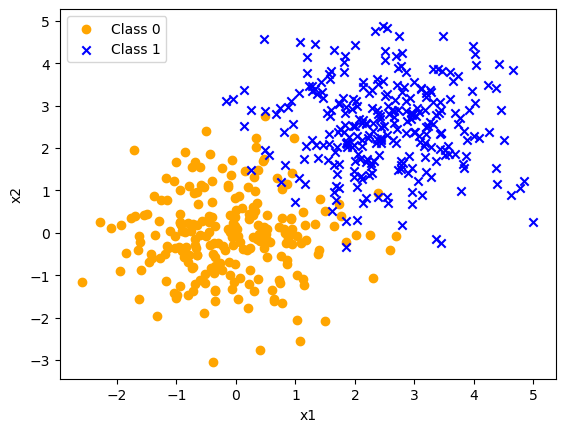

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Número de datos
N = 500

# Generar un conjunto de datos de muestra
np.random.seed(0)
x = np.random.randn(N, 2)
y = np.random.randint(0, 2, (N, 1))

# Separar los puntos de datos en dos grupos basados en su clase
class_0 = x[y.ravel() == 0]
class_1 = x[y.ravel() == 1]
class_1 += 2.5

# Recodifica la matriz de datos
x[y.ravel() == 1] += 2.5

# Graficar los puntos de datos
plt.scatter(class_0[:, 0], class_0[:, 1], marker='o', color='orange', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], marker='x', color='blue', label='Class 1')
plt.legend(loc='upper left')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()




In [12]:
#Una muestra de los datos es la siguiente

print('[x                  y]')
for (x,y) in zip(x,y):
    #print(np.round(x,2),y)
    print("x={}, y ={}".format(x,y))
    break

[x                  y]
x=[1.76405235 0.40015721], y =[0]


## <span style="color:blue">Etiquetado de los datos</span> 

Lo que postulamos como modelo separador de estas dos clases es una recta dada por 

$$
w x_1+  x_2 + b = 0
$$

Como es sabido esta recta divide el plano exactamente en tres regiones. Si por ejemplo la recta tuviera la forma  $2x+y-1=0$, se tendrían:

+ El conjunto de datos que están en la recta y satisfacen la ecuación. Por ejemplo el punto (0,1) está en la recta.
+ El conjunto de de datos que están por encima de la recta. En este caso se tiene que $2x+y-1>0$. Por ejemplo el punto (1,1) esta sobre la recta.
+ El conjunto de de datos que están por debajo de la recta. En este caso se tiene que $2x+y-1<0$. Por ejemplo el punto (0,0) está por debajo de  la recta.

Los datos anteriores han etiquetados con 0 y 1 respectivamente, por anotador. En este caso los autores de esta lección hemos hecho la anotación de forma conveniente. Esta tarea de anotación o etiquetado ha sido una tarea bastante usual a lo largo de la historia de al inteligencia artificial moderna.
En el ejemplo, la observación (1.76405235 0.40015721) fue etiquetada como 0.

## <span style="color:blue">Modelo de probabilidad </span> 

Lo que sabemos con precisión es que los datos son clasificados en dos categorías por lo que para el experimento podemos esperar que al selección cualquier pareja de números reales, esta pertenezca a una de esas dos clases, pero no sabemos a cual. Entonces estamos frente a un experimento de Bernoulli. Recordemos que si digamos $\pi$ es la probabilidad de que el punto sea de la clase 1, el modelo de probabilidad correspondiente esta dado por

$$
P(Y=y) = \pi^y(1-\pi)^{1-y}, \text{ con } y \in \{0,1\}.
$$

Observe que la etiqueta es $y$. y la variable aleatoria $Y$ toma valores 0, 1, únicamente. La pregunta es ¿Cómo asociamos las etiquetas a las coordenadas de los puntos?

Esta es la pregunta central en nuestro proceso de modelación. Para contestarlo, puede imaginar que los valores que toma la variable aleatoria $Y$ están regidos por la probabilidad $\pi$. Entonces, lo que vamos a intentar es asociar la probabilidad con las coordenadas de los puntos.

Construimos entonces una función predictora, de tal manera que dadas las coordenadas de un punto, las transforme en una probabilidad. ¿Cómo hacemos esto?

## <span style="color:blue">Función predictora</span> 

Para este ejemplo usaremos un modelo logístico como función de predicción. En el problema tenemos dos clases: clase 0 y clase 1. Tenemos dos variables predictoras $x_1$ y $x_2$ respectivamente y que corresponden a las coordenadas de los puntos. El vector predictor se denota $\mathbf{x}=(x_1,x_2)$.

La función predictora que introducimos es la `función de distribución  logística`, la cual llamaremos `sigmoide` en lo sucesivo. Este nombre deriva del hecho que la función tiene la forma de una letra s estirada. Como toda función de distribución, la logística tiene dominio en todos los número reales y como salida los números en el intervalo (0,1). Elegimos esta función de predicción porque la salida puede ser interpretada como una probabilidad. La función predictora general para este caso es dada entonces por


$$
\hat{y} = P[Y=1|\mathbf{x}, \mathbf{w}, b ]= g_{(\mathbf{w},b)}(\mathbf{x}) = \frac{1}{1 + \exp \{-(w_1x_1 + w_2x_2+b)\}},
$$

en donde el vector de parámetros  de nuestro modelo será $(\mathbf{w},b)$. Observe que $\hat{y}$ es un número real en el intervalo (0,1) que interpretamos como la probabilidad de que la muestra $\mathbf{x}$ provenga de la clase 1. Para usos prácticos la decisión se toma 'cuidadosamente', así:

1. Si $\hat{y}<0.5$ la muestra $\mathbf{x}$ proviene de la clase 0.

### <span style="color:#4CC9F0">El sigmoide</span>

El siguiente código dibuja la distribución logística estándar o sigmoide. Esta es una función muy importante en el área de la inteligencia artificial. En es ámbito es conocida como una función de activación. Aquí nos interesa porque convierte cualquier número real a un número en el intervalo (0,1), el cual puede ser interpretado como una probabilidad.

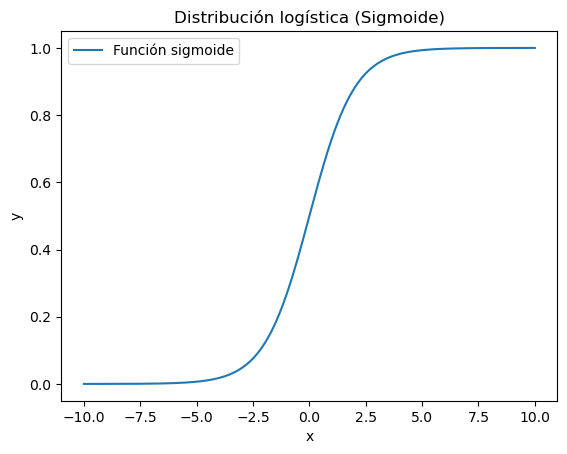

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

# Crear un conjunto de datos x
x = np.linspace(-10, 10, 1000)

# Calcular los valores de y utilizando la función sigmoide
y = expit(x)

# Graficar los datos utilizando la función plot de matplotlib
plt.plot(x, y, label='Función sigmoide')

# Añadir título y etiquetas de los ejes
plt.title('Distribución logística (Sigmoide)')
plt.xlabel('x')
plt.ylabel('y')

# Mostrar la leyenda y el gráfico
plt.legend()
plt.show()


### <span style="color:#4CC9F0">Ejemplo de uso de la función predictora</span>

El propósito del entrenamiento de nuestro modelo será determinar los mejores valores para $\mathbf{w}$ y $b$. Pero antes de hacerlo vamos suponer que ya lo hemos hechos y que tenemos que $\mathbf{w}=(2,1), b -1$, como hicimos antes. Veamos que predice nuestra función para los datos que probamos antes.

+ $g_{(\mathbf{w},b)}(1,1) = 0.119$. Punto en la clase 0.
+ $g_{(\mathbf{w},b)}(0,0) = 0.731$. Punto en la clase 1.
+ $g_{(\mathbf{w},b)}(0,1) = 0.500$. Punto en  la línea recta. 

El siguiente código Python muestra una forma de hacer el cálculo.

In [84]:
import numpy as np

w = (2,1)
b= -1
x = np.array([[1,1],[0,0], [0,1]])

yb = 1/(1+np.exp(np. matmul(x,w)+b))
print(yb)

[0.11920292 0.73105858 0.5       ]


Es importante que tenga en cuenta que las etiquetas pueden colocarse al contrario. ¿Porque?

## <span style="color:blue">Función de probabilidad conjunta</span>

Si estuvo muy atento en la sección anterior, puede ahora entender que para cualquier punto $(x_1,x_2) \in \mathbb{R}^2$ se determina un modelo de probabilidad diferente. En realidad la probilidad de que un punto obtenga una determinada etiqueta depende de su posición en el espacio. Entonces para un punto dado $(x_1,x_2) \in \mathbb{R}^2$ la probabilidad de que obtenga una determinada etiqueta del conjunto $\{0,1\}$ termina siendo una probabilidad condicional dada por

$$
P(Y=y|\mathbf{x}, \mathbf{w}, b) = [g_{(\mathbf{w},b)}(\mathbf{x})]^y \times [1-g_{(\mathbf{w},b)}(\mathbf{x})]^{1-y}
$$


Si por otro lado, suponemos que se obtendrán $N$ muestras $(\mathbf{x}, y_i), \hspace{3mm} i=1,\ldots,N$, la función de probabilidad conjunta para esa muestra es dada por

$$
P(\mathbf{Y}=\mathbf{y}|\mathbf{X}, \mathbf{w},b) = \prod_{i=1}^N[g_{(\mathbf{w},b)}(\mathbf{x}_i)]^{y_i} \times [1-g_{(\mathbf{w},b)}(\mathbf{x}_i)]^{1-y_i}.
$$

Aqui hemos denotado 
+ $\mathbf{Y}= (Y_1, \ldots, Y_N)$,  
+ $\mathbf{y}= (y_1, \ldots, y_N)$,  
+ $\mathbf{X}= (\mathbf{x}_1, \ldots, \mathbf{x}_N)$.

### <span style="color:#4CC9F0">Poder predictivo del modelo de probabilidad</span>

Queremos dejar bastante claro porque nuestro modelo de probabilidad en realidad es un modelo predictivo en todo el sentido de la palabra. Esta es la magia que subyace en los modelos de probabilidad.  Para esto nos apoyaremos en el modelo del ejemplo con $\mathbf{w}=(2, 1), b = -1$. Recuerde que en el modelo hemos definido $P[Y=1|\mathbf{x}] = g_{(\mathbf{w},b)}(\mathbf{x})$.

Tomemos el punto $\mathbf{x} = (1,1)$. Supongamos que necesitamos asignar una etiqueta a este punto. La etiqueta es desconocida y por tanto será el resultado de la evaluación de una variable aleatoria $Y$  y tenemos que


+ $Prob(Y=1) = g_{(\mathbf{w},b)}(\mathbf{x}) = 0.119$
+ $Prob(Y=0) = (1-g_{(\mathbf{w},b)}(\mathbf{x})) = 0.881$

Nuestro modelo predice que  *con probabilidad 0.881* este punto proviene de la clase 1. 

### <span style="color:#4CC9F0">Implementación de la función predictora</span>

Nuestro modelo `predice` la probabilidad  que el punto $\mathbf{x}$ pertenece a la clase 1. Entonces nuestra implementación en Tensorflow es como sigue:

In [43]:
import tensorflow as tf

def pred(x):
    '''
    Función de predictora logística o sigmoide
    f_w(x) = 1/(1 + exp(-(1+ w'x+b)))
    '''
    y_hat = 1 / (1 + tf.exp(-tf.add(tf.matmul(x,w),b)))
    return y_hat

# prueba
#w = [2, -1]
w = tf.Variable([[2.],[1.]])
b = tf.Variable([-1.])
x = tf.constant(
    [[1.,1.], 
     [0., 0.],
     [0., 1.]]
     )

prediccion = pred(x)
print(prediccion) #[[0.11920292],[0.7310586 ], [0.5]]

tf.Tensor(
[[0.11920292]
 [0.7310586 ]
 [0.5       ]], shape=(3, 1), dtype=float32)


## <span style="color:blue">Log verosimilitud y función de pérdida</span>

El proceso de entrenamiento de nuestro modelo consiste en estimar los parámetros $(\mathbf{w},b)$ del modelo a partir de los datos de entrenamiento recibidos.

Recordemos que la función de probabilidad definida por nuestro modelo de Bernoulli es dada por

$$
P(Y=y| \mathbf{w},b, \mathbf{x}) = [g_{(\mathbf{w},b)}(\mathbf{x})]^y \times [1-g_{(\mathbf{w},b)}(\mathbf{x})]^{1-y}.
$$

Como modelo de probabilidad es necesario asumir que se conocen los valores para $w$ y $b$. Eso hemos hecho para poder presentar los ejemplos previos. Pero en este momento vamos a cambiar la perspectiva. Al disponer del dato de entrenamiento nuestra función ahora tiene conocidos los valores $(\mathbf{x},y)$. Vamos a definir la función de verosimilitud con la misma expresión, pero ahora consideramos como desconocidos a los parámetros $w$ y $b$. Esta nueva función se denomina veromilitud para la observación $(\mathbf{x},y)$ y se denota

$$
l(\mathbf{w},b|\mathbf{x},y) =  [g_{(\mathbf{w},b)}(\mathbf{x})]^y \times [1-g_{(\mathbf{w},b)}(\mathbf{x})]^{1-y}
$$

Si tomamos logaritmo y anteponemos el signo menos obtenemos la función de pérdida

$$
\mathfrak{L}(\mathbf{w},b|\mathbf{x},y) = - (y\log[g_{(\mathbf{w},b)}(\mathbf{x})] + (1-y)[\log[1-g_{(\mathbf{w},b)}(\mathbf{x})])
$$

Hemos encontrado la entropía cruzada entre dos distribuciones:

+ La distribución de referencia dada por $[y, 1-y]$
+ La distribución aproximante dada por $[g_{(\mathbf{w},b)}(\mathbf{x}), 1-g_{(\mathbf{w},b)}(\mathbf{x})]$.

Para el conjunto de datos de entrenamiento $(\mathbf{x}, y_i), \hspace{3mm} i=1,\ldots,N$, la entropía cruzada *promedio* es dada por

$$
\mathfrak{L}(\mathbf{w},b|\mathbf{X},\mathbf{y}) = -\frac{1}{N} \sum_{i=1}^N y_i\log[g_{(\mathbf{w},b)}(\mathbf{x}_i)] + (1-y_i)[\log[1-g_{(\mathbf{w},b)}(\mathbf{x}_i)]
$$

Esta es la función que es necesario minimizar con respecto a $\mathbf{w}$ y $b$.

El proceso de optimización requiere el cálculo del gradiente de esta función de pérdida el cual es dado por

$$
\nabla_{(\mathbf{w},b)}\mathfrak{L}(\mathbf{w},b|\mathbf{X},\mathbf{y}) = \left[\frac{\partial \mathfrak{L}}{\partial \mathbf{w}}, \frac{\partial \mathfrak{L}}{\partial b}\right]
$$

### <span style="color:#4CC9F0">Ejercicio</span>

Calcule explícitamente $\nabla_{(w,b)}\mathfrak{L}(\mathbf{w},b|\mathbf{X},\mathbf{y})$.

### <span style="color:#4CC9F0">Implementación de la función de pérdida</span>

In [70]:
def loss_f(y,y_pred):
    loss = -tf.reduce_mean(y * tf.math.log(y_pred) + (1 - y) * tf.math.log(1 - y_pred))
    return loss

### <span style="color:#4CC9F0">Regularización L2</span>

Es muy frecuente tener que introducir un regularizador para evitar que la norma del vector $\mathbf{w}$ crezca demasiado, lo que implica sobre ajuste en el modelo. En el siguiente código se ilustra como introducir el regulador L2.

In [106]:
def loss_f_L2(y, y_pred,w, l=1):
    loss = tf.add(loss_f(y,y_pred) - l*tf.matmul(tf.transpose(w),w))
    return loss

## <span style="color:blue">Entrenamiento del modelo (la red neuronal)</span>

<figure> 
<img src="../Imagenes/trainer.png"  width="800" height="800" align="center"/> 
</figure>

<center>Entrenamiento de una red neuronal. Modelo de objetos.</center>

Fuente Alvaro Montenegro

El siguiente es el código completo paar resolver el problema

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam


# Inicializar pesos aleatorios y modelo
np.random.seed(1)
#w = tf.Variable(np.random.randn(2, 1))
w = tf.Variable([[-2.0], [2.0]])
#b = tf.Variable([0.])
b = tf.Variable([0.])

# Generar un conjunto de datos de muestra
np.random.seed(0)
x = np.random.randn(N, 2)
y = np.random.randint(0, 2, (N, 1))

# Separar los puntos de datos en dos grupos basados en su clase
class_0 = x[y.ravel() == 0]
class_1 = x[y.ravel() == 1]
class_1 += 2.5

# Recodifica la matriz de datos
x[y.ravel() == 1] += 2.5

# convierte x en un tensor constante
x = tf.constant(x)
y = tf.constant(y)

# ajusta los tipos de datos para evitar problemas de cálculo
w = tf.cast(w, tf.float32)
b = tf.cast(b, tf.float32)
x = tf.cast(x, tf.float32)
y = tf.cast(y, tf.float32)

#optimizer = Adam()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

# función predictora
def pred(x):
    y_hat = 1 / (1 + tf.exp(-tf.add(tf.matmul(x,w),b)))
    return y_hat

# pérdida
def loss_f(y,y_pred):
    loss = -tf.reduce_mean(y * tf.math.log(y_pred) + (1 - y) * tf.math.log(1 - y_pred))
    return loss

# Bucle de entrenamiento
losses = []
accuracies = []

def train_step(x, y):
    with tf.GradientTape() as tape:
        y_pred = pred(x)
        l = loss_f(y, y_pred)
    grads = tape.gradient(l, [w, b])
    optimizer.apply_gradients(zip(grads, [w, b]))
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.round(y_pred), y), tf.float32))
    return l, accuracy

# Entrenar el modelo durante varias épocas
epochs = 10
for epoch in range(epochs):
    avg_loss = 0.
    avg_accuracy = 0.
    total_batch = int(len(x) / 32)
    for i in range(total_batch):
        batch_x = x[i * 32:(i + 1) * 32]
        batch_y = y[i * 32:(i + 1) * 32]
        l, accuracy = train_step(batch_x, batch_y)
        avg_loss += l / total_batch
        avg_accuracy += accuracy / total_batch
        losses.append(avg_loss)
        accuracies.append(avg_accuracy)
    print("Epoch:", epoch, "loss:", avg_loss.numpy(), "accuracy:", avg_accuracy.numpy())

Epoch: 0 loss: 0.8554065 accuracy: 0.68333334
Epoch: 1 loss: 0.40895918 accuracy: 0.8437499
Epoch: 2 loss: 0.20631151 accuracy: 0.92499995
Epoch: 3 loss: 0.13479117 accuracy: 0.9499999
Epoch: 4 loss: 0.11106267 accuracy: 0.9625
Epoch: 5 loss: 0.10282208 accuracy: 0.96458316
Epoch: 6 loss: 0.09847403 accuracy: 0.9687499
Epoch: 7 loss: 0.09532579 accuracy: 0.9687499
Epoch: 8 loss: 0.09287048 accuracy: 0.9687499
Epoch: 9 loss: 0.09092692 accuracy: 0.9708333


In [13]:
w_opt = w.numpy()
b_opt = b.numpy()

print('w =', w_opt)
print('b =',b_opt)

w = [[1.9622128]
 [1.9799416]]
b = [-4.368994]


## <span style="color:blue">Ilustración del modelo</span>

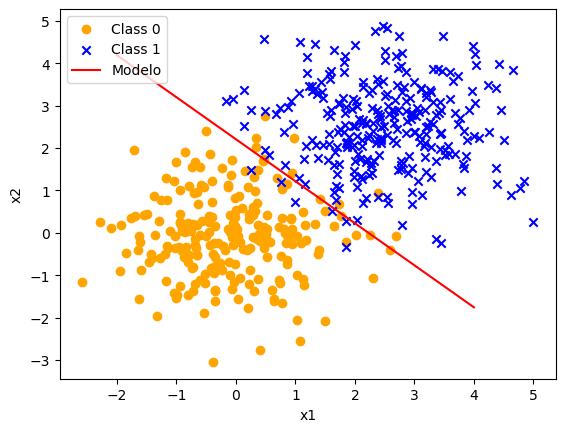

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Número de datos
N = 500

# Generar un conjunto de datos de muestra
np.random.seed(0)
x = np.random.randn(N, 2)
y = np.random.randint(0, 2, (N, 1))

# Separar los puntos de datos en dos grupos basados en su clase
class_0 = x[y.ravel() == 0]
class_1 = x[y.ravel() == 1]
class_1 += 2.5

# Recodifica la matriz de datos
x[y.ravel() == 1] += 2.5


# modelo
z  = range(-2,5)
v = - w_opt[0]/w_opt[1]*z - b_opt/w_opt[1]

# Graficar los puntos de datos
plt.scatter(class_0[:, 0], class_0[:, 1], marker='o', color='orange', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], marker='x', color='blue', label='Class 1')
plt.plot(z,v, color='red', label='Modelo')
plt.legend(loc='upper left')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


### <span style="color:#4CC9F0">Ejercicio: Clase Trainer</span>


Como ejercicio se propone la implementación de esta clase, basandose en el código anterior.

Esta clase es diseñada para controlar el proceso de entrenamiento. Antes de crear un objeto de tipo datset, asegúrese de tener disponible los siguiente objetos

1. Un modelo.
1. Un optimizador configurado para el modelo
1. Una función de pérdida adecuada para el modelo

Opcionalmente puede de un objeto SummaryWriter de Tensorboard y el path para almacenar los modelos.

Para ejecutar el método `fit` se requiere disponer de los objetos de datos para entrenamiento y validación. 

**¡Eso es todo!**